In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('intraday.csv', parse_dates= ['time'], index_col= 'time')

In [3]:
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


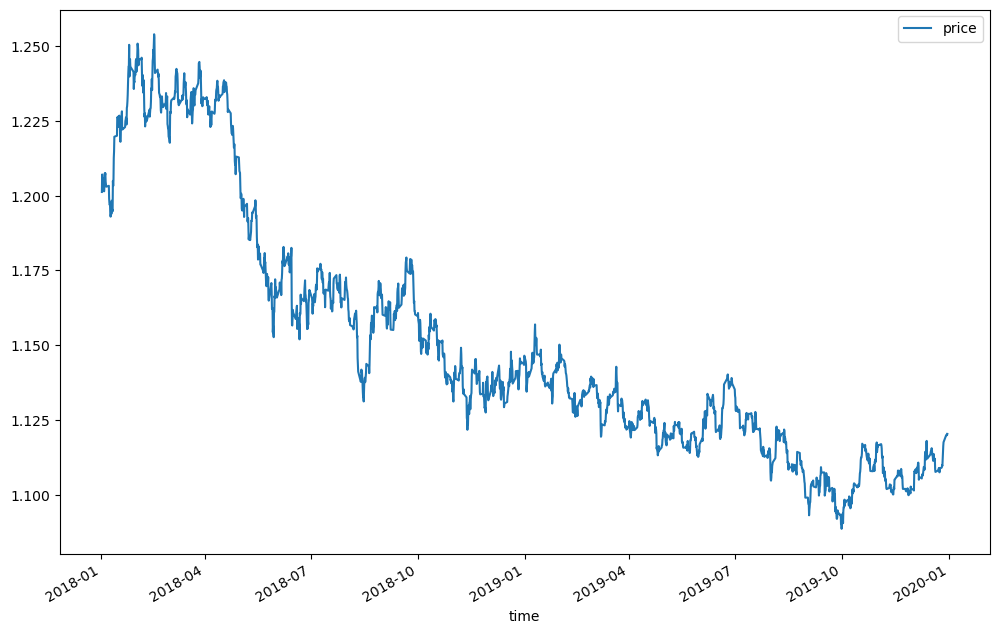

In [4]:
data.plot(figsize =(12,8))
plt.show()

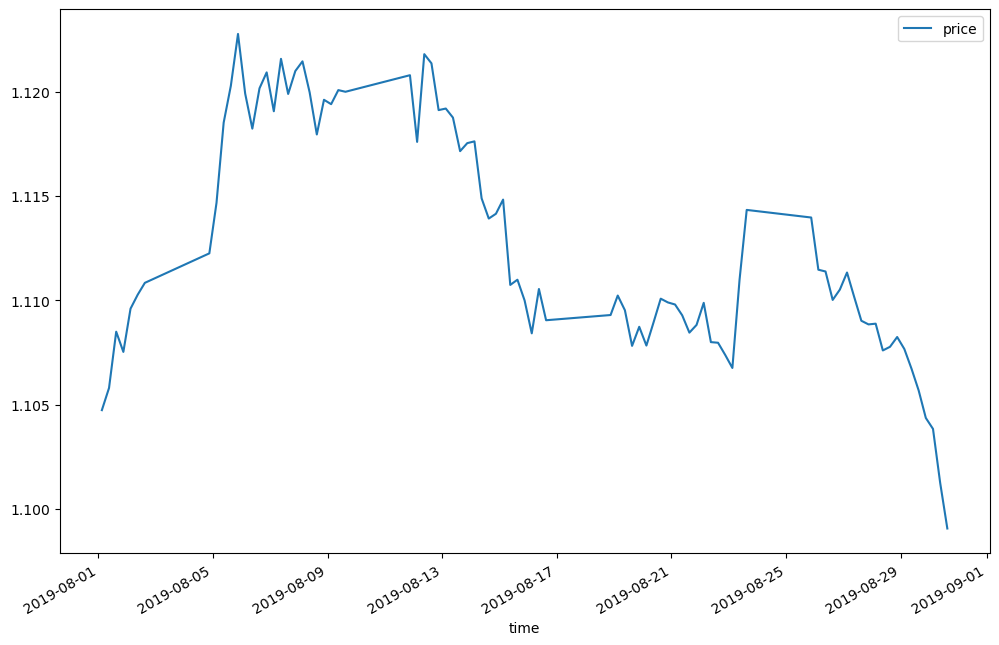

In [5]:
data.loc['2019-08'].plot(figsize =(12,8))
plt.show()

In [6]:
data['returns'] = np.log(data.div(data.shift(1)))

In [7]:
data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


# Defining a Mean Reversion Strategy (Bollinger Bands)

**Mean Reversion** - Financial intruments are from time to time overbought/oversold and always hover back to the mean prices.

**Bollinger Bands** - Consists of a SMA(eg-30) and upper and lower bands +-(2) std dev away from the SMA. 

In [8]:
SMA = 30
dev = 2

In [9]:
data['SMA'] = data.price.rolling(SMA).mean()

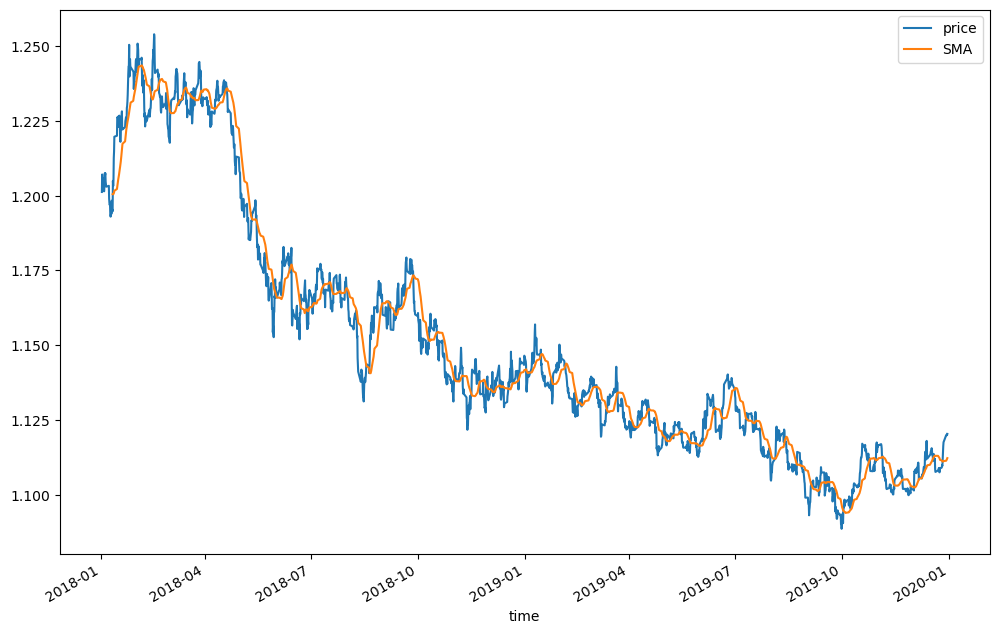

In [10]:
data[['price', 'SMA']].plot(figsize =(12,8))
plt.show()

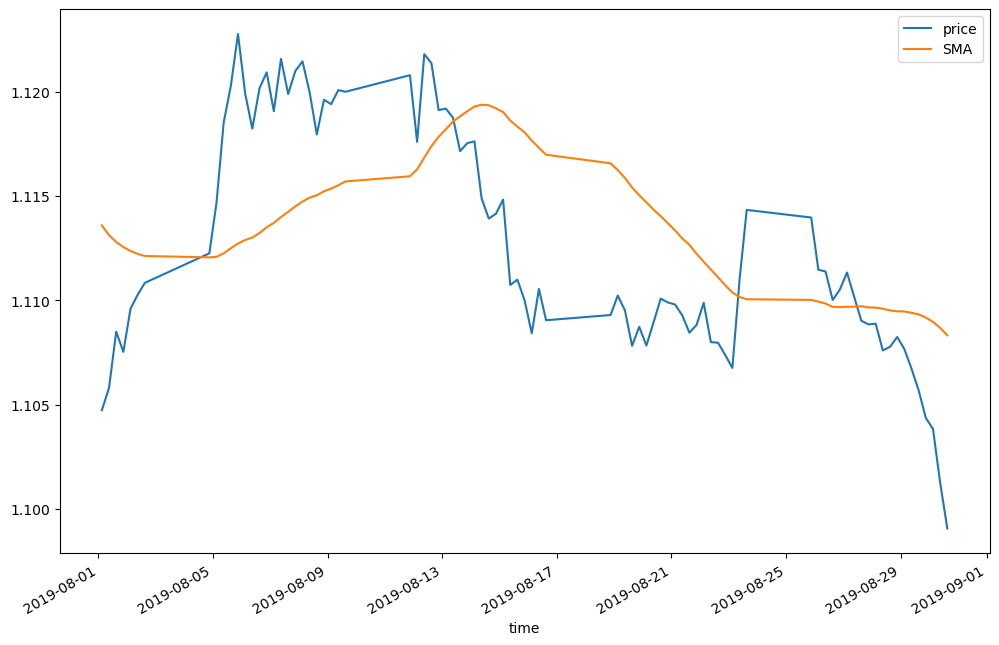

In [11]:
data.loc['2019-08', ['price', 'SMA']].plot(figsize =(12,8))
plt.show()

In [12]:
data.price.rolling(SMA).std()

time
2018-01-01 22:00:00+00:00         NaN
2018-01-02 04:00:00+00:00         NaN
2018-01-02 10:00:00+00:00         NaN
2018-01-02 16:00:00+00:00         NaN
2018-01-02 22:00:00+00:00         NaN
                               ...   
2019-12-29 22:00:00+00:00    0.003088
2019-12-30 04:00:00+00:00    0.003400
2019-12-30 10:00:00+00:00    0.003729
2019-12-30 16:00:00+00:00    0.004008
2019-12-30 22:00:00+00:00    0.004288
Name: price, Length: 2070, dtype: float64

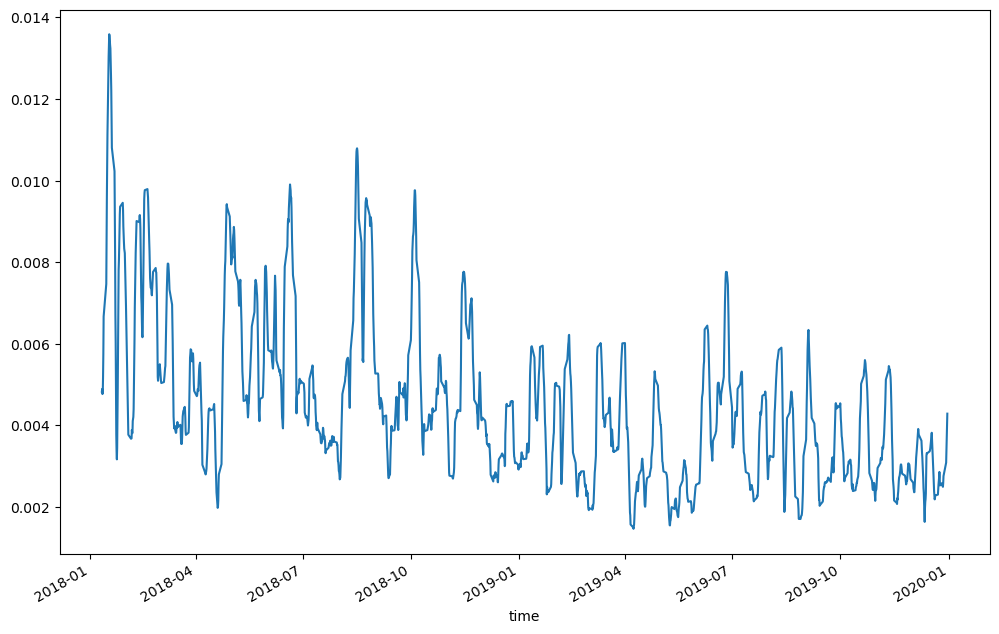

In [13]:
data.price.rolling(SMA).std().plot(figsize =(12,8))
plt.show()

In [14]:
data['lower'] = data['SMA'] - data.price.rolling(SMA).std() * dev #Lower band of bollinger

In [15]:
data['upper'] = data['SMA'] + data.price.rolling(SMA).std() * dev #Upper band of bollinger

In [16]:
data

,price,returns,SMA,lower,upper
time,,,,,
2018-01-01 22:00:00+00:00,1.201205,NaN,NaN,NaN,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,NaN,NaN,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235


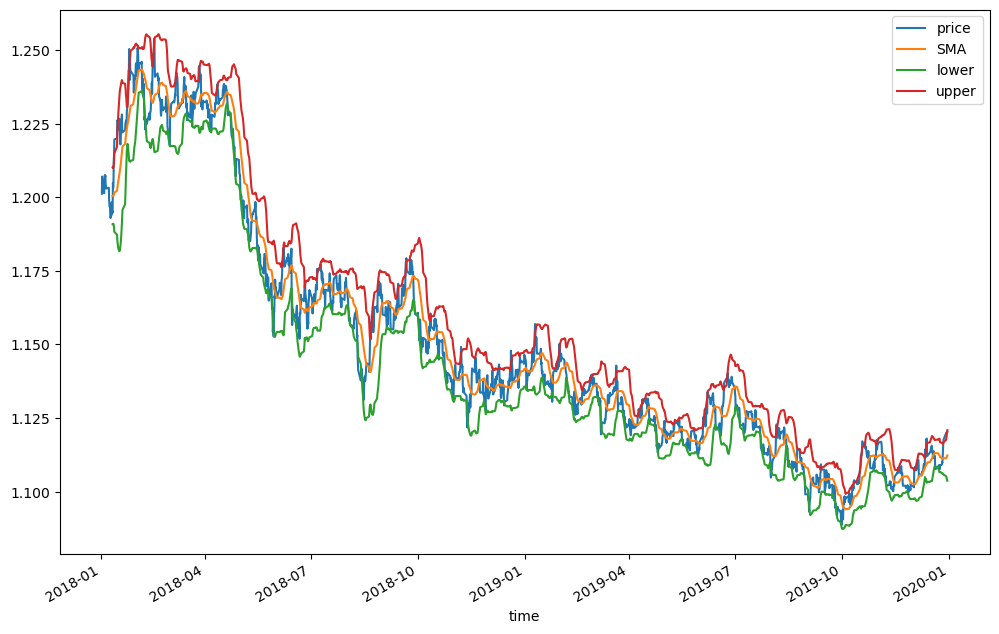

In [17]:
data.drop(columns= 'returns').plot(figsize =(12,8))
plt.show()

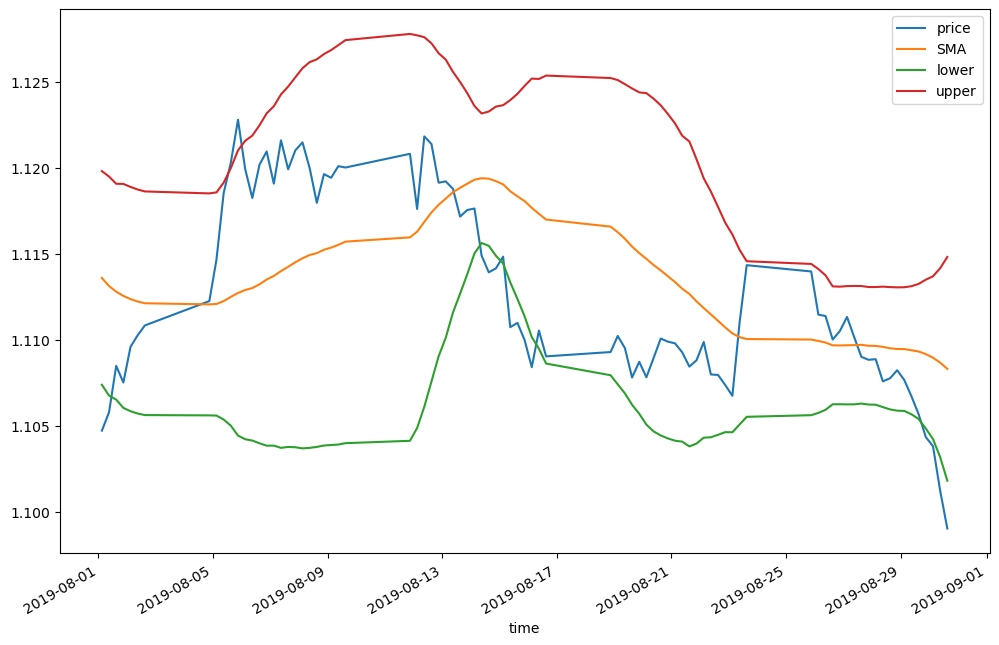

In [18]:
data.drop(columns= 'returns').loc['2019-08'].plot(figsize =(12,8))
plt.show()

In [19]:
data.dropna(inplace= True)

### According to Bollinger Bands we short the instrument when the price goes above the upper band and we buy the instrument when it goes below the upper band. We dont take any position when the price stays within the band.

In [20]:
#helper column to calculate the distance between price and SMA.
data['distance'] = data.price - data.SMA

In [21]:
data['position'] = np.where(data.price < data.lower, 1, np.nan) #going long (oversold)
data['position'] = np.where(data.price > data.upper, -1,data['position']) #going short (overbought)

In [22]:
data

,price,returns,SMA,lower,upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,NaN
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,NaN
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,NaN
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0


In [23]:
#crossing SMA (go neutral)
data['position'] = np.where(data.distance * data.distance.shift(1)<0, 0, data['position'])

In [24]:
# if out of those three rules, none apply then we should hold the postion that we are already in
data.position = data.position.ffill().fillna(0)
#forward filling to indicate the previous position
# ffill to fill the very first value to neutral position

In [25]:
data

,price,returns,SMA,lower,upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,0.0
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0


In [26]:
data.position.value_counts()

 0.0    919
 1.0    596
-1.0    526
Name: position, dtype: int64

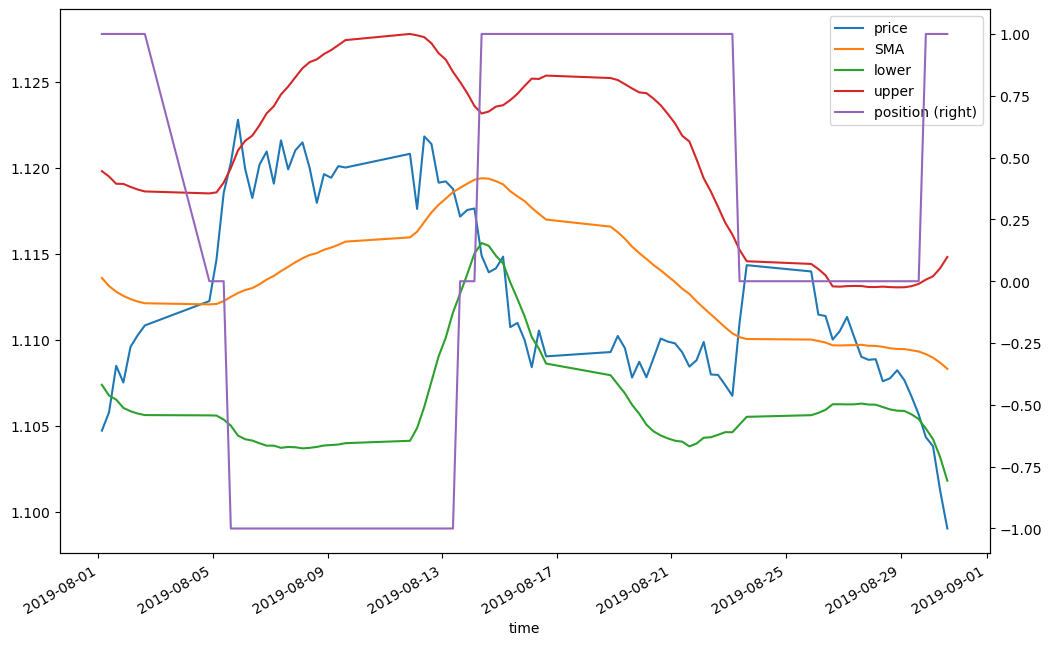

In [27]:
data.drop(columns = ['distance', 'returns']).loc['2019-08'].plot(figsize =(12,8), secondary_y = 'position')
plt.show()

# Vectorized Backtesting

In [28]:
data['strategy'] = data.position.shift(1) * data.returns

In [29]:
data.dropna(inplace= True)

In [30]:
data['cumreturns'] = data['returns'].cumsum().apply(np.exp)
data['cumstrategy'] = data['strategy'].cumsum().apply(np.exp)

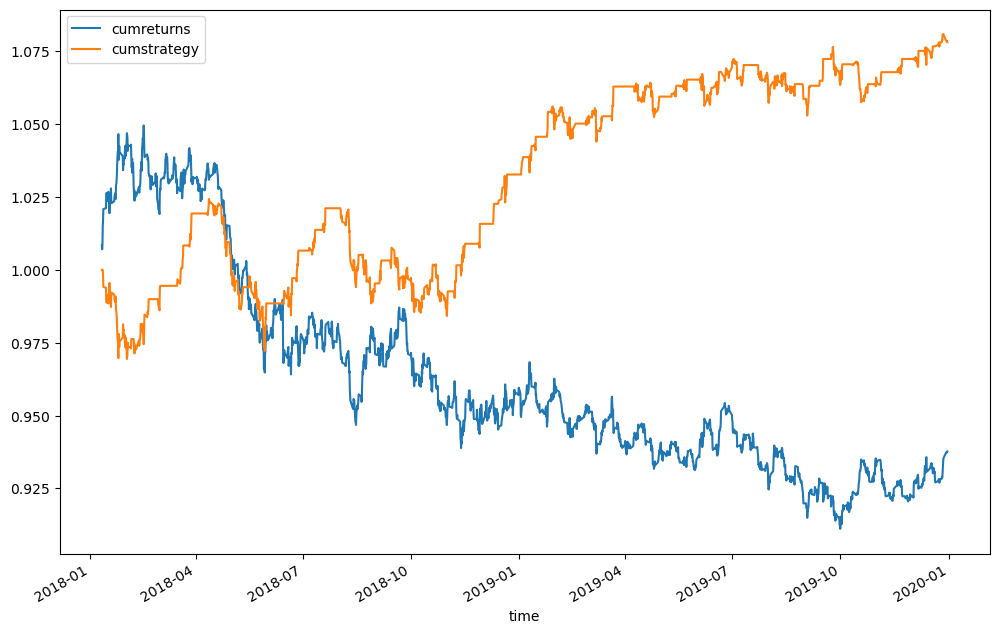

In [31]:
data[['cumreturns', 'cumstrategy']].plot(figsize =(12,8))
plt.show()

In [32]:
ptc = 0.00007   #proportional trading cost

In [33]:
data['trades'] = data.position.diff().fillna(0).abs()

In [34]:
data

,price,returns,SMA,lower,upper,distance,position,strategy,cumreturns,cumstrategy,trades
time,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000,1.0
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555,0.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536,0.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387,0.0


In [35]:
data['strategy_net'] = data.strategy - data.trades *ptc

In [36]:
data

,price,returns,SMA,lower,upper,distance,position,strategy,cumreturns,cumstrategy,trades,strategy_net
time,,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000,0.0,0.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000,0.0,-0.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000,0.0,0.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000,1.0,-0.000070
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115,0.0,-0.001887
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555,0.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536,0.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387,0.0,-0.000138


In [37]:
data['cumstrategy_net'] = data.strategy_net.cumsum().apply(np.exp)

In [38]:
data[['returns', 'strategy_net']].mean()* (4*252) #annualized return

returns        -0.031776
strategy_net    0.033335
dtype: float64

In [39]:
data[['returns', 'strategy_net']].std() * (4*252) #annualized risk

returns         1.904152
strategy_net    1.416758
dtype: float64